<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/Vetting/TIC_257870150_Vetting_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [3]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
data = pd.read_csv("lc_1.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error)#.bin(time_bin_size=0.005)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 257870150
period = 0.704764613905649  # Orbital period in days
epoch = 2474.22211357492
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 0.07]
folded_lc = folded_lc[folded_lc.time > -0.07]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_257870150_all_sector_lightcurve.csv


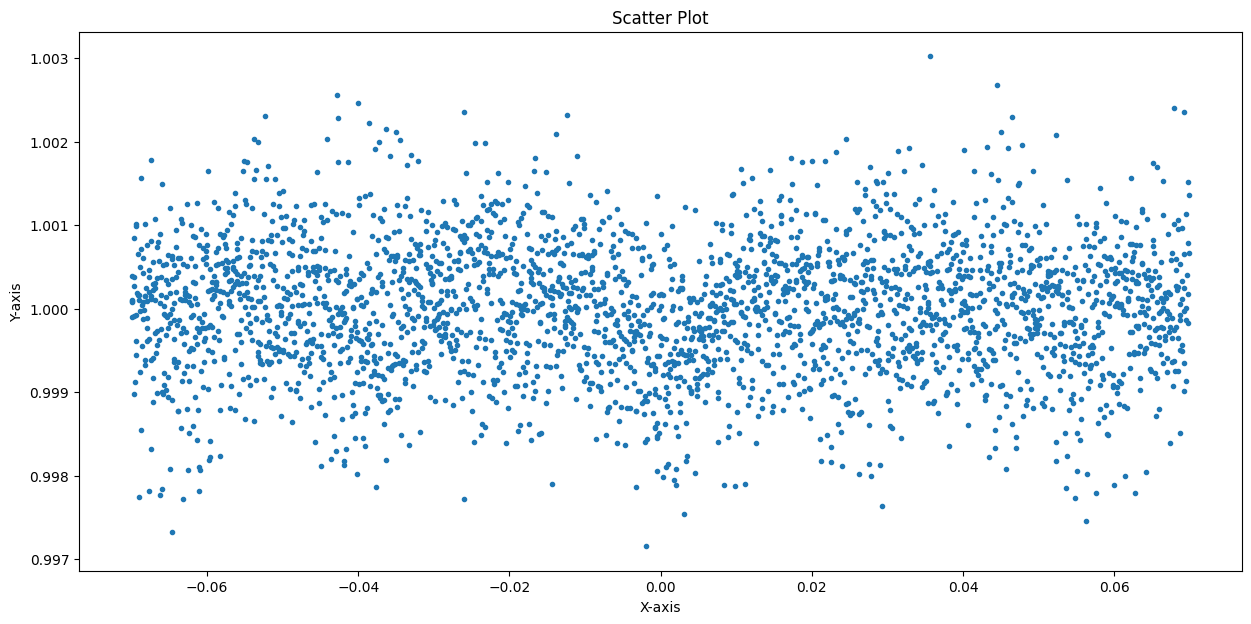

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [7]:
ID = tic_id
sectors = np.array([43])
target = tr.target(ID=ID, sectors=sectors, search_radius=8) # target radius shorted

Sector 43


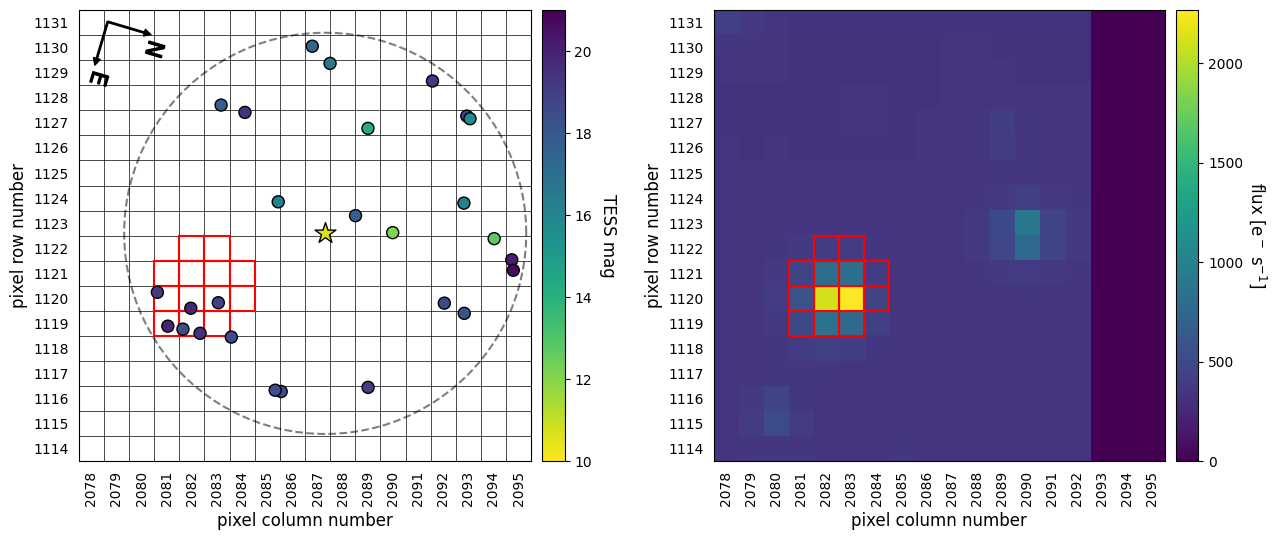

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,257870150,10.5650,8.394,7.883,7.585,43.253714,16.881289,0.094551,0.118649,2790.0,261.015000,0.000,0.000
1,257870152,17.6520,16.417,15.762,15.056,43.247503,16.886858,NaN,NaN,NaN,NaN,29.320,313.137
2,257870146,16.1966,15.211,14.744,14.422,43.249734,16.868728,0.780000,1.186610,4817.0,0.419685,47.255,196.865
3,257870153,12.1133,11.419,11.207,11.103,43.248821,16.896268,NaN,1.384500,6427.4,NaN,56.495,342.641
4,257870151,14.2238,13.082,12.456,12.260,43.226499,16.883793,0.689000,0.665181,4405.0,3.004740,94.183,275.494
5,640254563,18.8358,NaN,NaN,NaN,43.277206,16.862139,0.400000,0.334775,3404.0,1.388920,106.315,130.424
6,640254574,18.6016,NaN,NaN,NaN,43.261463,16.912475,NaN,NaN,3567.0,1.196090,115.399,13.373
7,257885983,18.5492,16.843,16.129,15.895,43.284226,16.867329,NaN,NaN,3986.0,1.365260,116.511,115.549
8,257870156,16.2027,15.087,14.454,14.313,43.237016,16.910144,0.740000,0.686176,4643.0,0.997523,118.738,331.029
9,640254560,19.4400,NaN,NaN,NaN,43.231441,16.855334,NaN,NaN,4279.0,2.571150,120.908,219.397


In [8]:
ap_43 = np.array([[2081.0, 1119.0], [2081.0, 1120.0], [2081.0, 1121.0], [2082.0, 1119.0],
      [2082.0, 1120.0], [2082.0, 1121.0], [2082.0, 1122.0], [2083.0, 1119.0], [2083.0,
        1120.0], [2083.0, 1121.0], [2083.0, 1122.0], [2084.0, 1120.0], [2084.0, 1121.0]])

apertures = np.array([ap_43])
for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars
# I am a little bit concerned about this apperture, pixel position and the magnitude of the star

In [9]:
tdepth = 0.333 / 1000
target.calc_depths(tdepth=tdepth, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,257870150,10.5650,8.394,7.883,7.585,43.253714,16.881289,0.094551,0.118649,2790.0,261.015000,0.000,0.000,4.177132e-03,0.079720
1,257870152,17.6520,16.417,15.762,15.056,43.247503,16.886858,NaN,NaN,NaN,NaN,29.320,313.137,3.305100e-10,0.000000
2,257870146,16.1966,15.211,14.744,14.422,43.249734,16.868728,0.780000,1.186610,4817.0,0.419685,47.255,196.865,9.104965e-04,0.365735
3,257870153,12.1133,11.419,11.207,11.103,43.248821,16.896268,NaN,1.384500,6427.4,NaN,56.495,342.641,1.242909e-12,0.000000
4,257870151,14.2238,13.082,12.456,12.260,43.226499,16.883793,0.689000,0.665181,4405.0,3.004740,94.183,275.494,3.202297e-20,0.000000
5,640254563,18.8358,NaN,NaN,NaN,43.277206,16.862139,0.400000,0.334775,3404.0,1.388920,106.315,130.424,2.619383e-01,0.001271
6,640254574,18.6016,NaN,NaN,NaN,43.261463,16.912475,NaN,NaN,3567.0,1.196090,115.399,13.373,1.028997e-24,0.000000
7,257885983,18.5492,16.843,16.129,15.895,43.284226,16.867329,NaN,NaN,3986.0,1.365260,116.511,115.549,1.019164e-01,0.003267
8,257870156,16.2027,15.087,14.454,14.313,43.237016,16.910144,0.740000,0.686176,4643.0,0.997523,118.738,331.029,2.406341e-31,0.000000
9,640254560,19.4400,NaN,NaN,NaN,43.231441,16.855334,NaN,NaN,4279.0,2.571150,120.908,219.397,9.975590e-13,0.000000


In [10]:
%%time

# read in the light curve
lc = pd.read_csv(f"TIC_{ID}_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating TP scenario probabilitiey for 257870150.
Calculating EB and EBx2P scenario probabilities for 257870150.
Calculating PTP scenario probability for 257870150.
Calculating PEB and PEBx2P scenario probabilities for 257870150.
Calculating STP scenario probability for 257870150.
Calculating SEB and SEBx2P scenario probabilities for 257870150.
Calculating DTP scenario probability for 257870150.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating DEB and DEBx2P scenario probabilities for 257870150.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating BTP scenario probability for 257870150.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating BEB and BEBx2P scenario probabilities for 257870150.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]
/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 257870146.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 640254563.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 257885983.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 640254565.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 640254564.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 257870144.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 257870142.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 640254562.
CPU times: user 23min 4s, sys: 10.8 s, total: 23min 15s
Wall time: 15min 2s


In [11]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = 0.98749414
NFPP = 0.97154286


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,257870150,TP,0.094551,0.118649,0.704765,82.806557,1.741456,0.259395,326.868456,9.740295,0.000000,0.000000,0.007611
1,257870150,EB,0.094551,0.118649,0.704765,78.680539,3.165436,0.000484,216.116532,0.000000,0.094551,0.112017,0.000000
2,257870150,EBx2P,0.094551,0.118649,1.409529,85.809324,1.928748,0.404176,332.162013,0.000000,0.094551,0.112017,0.009134
3,257870150,PTP,0.094551,0.118649,0.704765,84.638521,1.513574,0.470139,305.103080,8.406051,0.000000,0.000000,0.000049
4,257870150,PEB,0.094551,0.118649,0.704765,38.364176,12.205267,0.044546,49.122365,0.000000,0.094551,0.112017,0.000000
5,257870150,PEBx2P,0.094551,0.118649,1.409529,86.328500,1.740404,0.467799,325.582845,0.000000,0.094551,0.112017,0.000842
6,257870150,STP,0.094551,0.112017,0.704765,85.553178,1.535735,0.495004,282.445131,7.182088,0.000000,0.000000,0.000058
7,257870150,SEB,0.094551,0.112017,0.704765,75.391926,4.306961,0.000001,289.005133,0.000000,0.094551,0.112017,0.000000
8,257870150,SEBx2P,0.094551,0.112017,1.409529,86.489603,1.792354,0.454892,324.281924,0.000000,0.094551,0.112017,0.000000
9,257870150,DTP,0.094551,0.118649,0.704765,86.370698,1.186056,0.464378,269.065048,4.637023,0.000000,0.000000,0.004846


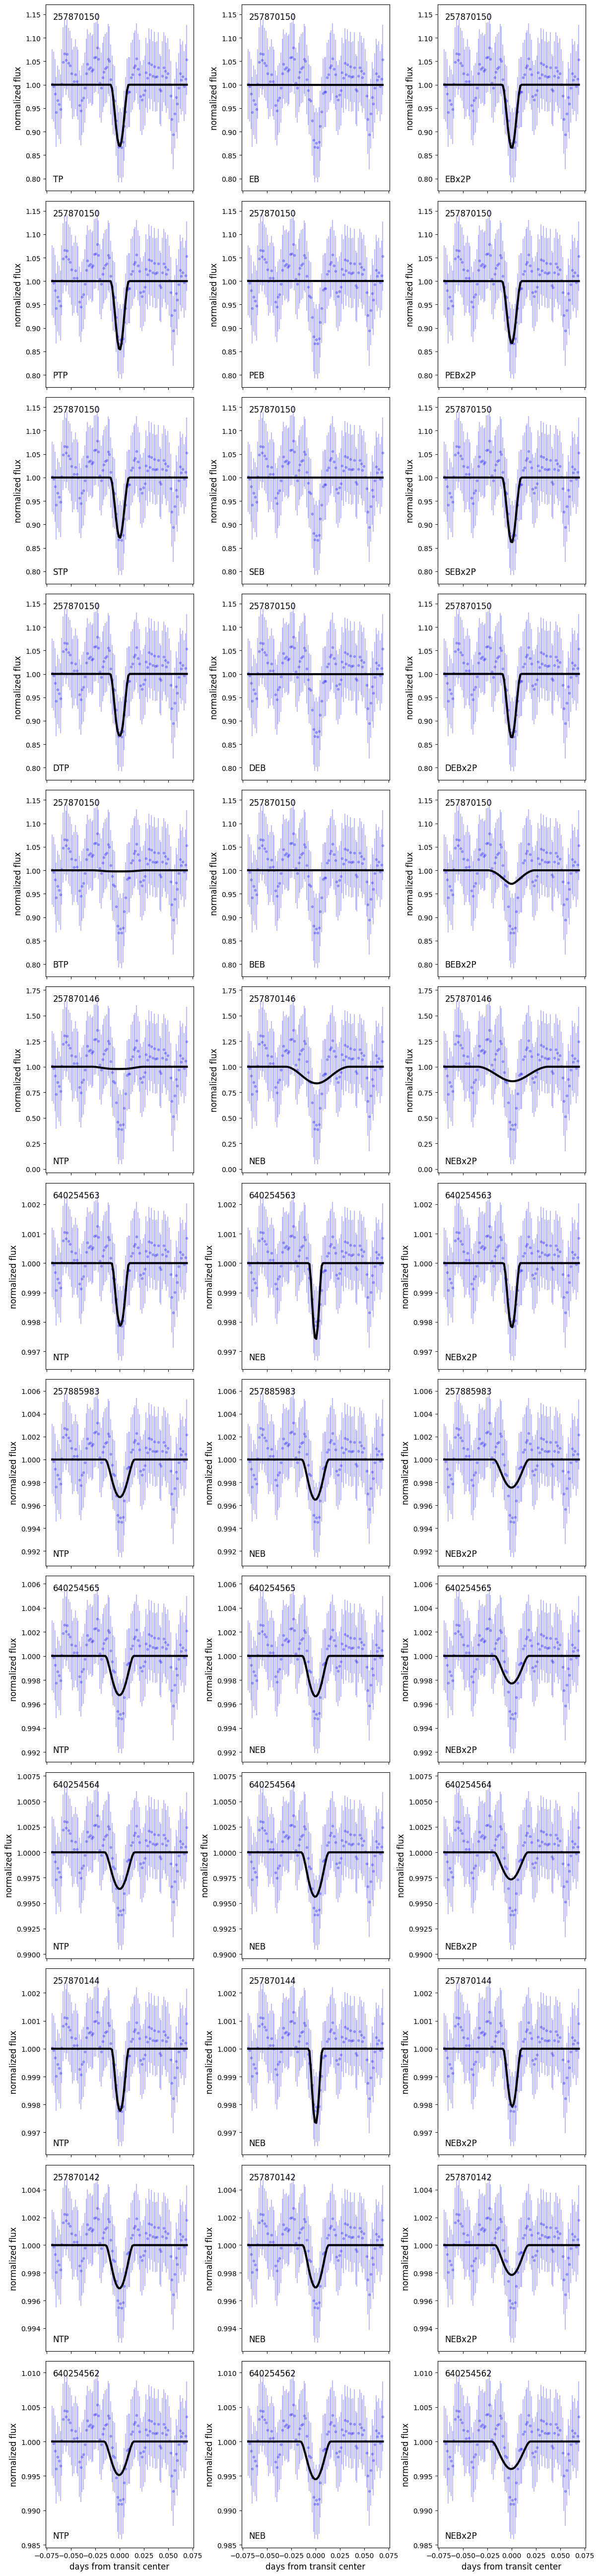

In [12]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
%%time
# Repetition reduced
FPPs = np.zeros(10)
NFPPs = np.zeros(10)
for i in range(10):
    target.calc_probs(time=lc.time.value,
                      flux_0=lc.flux.value,
                      flux_err_0=np.mean(lc.flux_err.value),
                      P_orb=P_orb,
                      parallel=True,
                      verbose=0)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP

meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

FPP = 0.9874407493093127 +/- 0.00010589793360501661
NFPP = 0.97132726385016 +/- 0.0001966860818143277
CPU times: user 3h 43min 51s, sys: 1min 46s, total: 3h 45min 38s
Wall time: 2h 23min 37s


Our final conclusion about this specified planet of TIC 257870150 is that it is a false positive (according to the range of FPP and NFPP set by TRICERATOPS).